# Домашнее задание 6. Визуализация

27 ноября 1895 года Альфред Нобель подписал в Париже свое последнее завещание. Когда завещание было вскрыто после его смерти, оно вызвало много споров, поскольку Нобель оставил большую часть своего состояния для учреждения премии.

Альфред Нобель постановил, что все его оставшееся состояние должно быть использовано для учреждения "премий тем, кто в течение предшествующего года принес наибольшую пользу человечеству".

Каждый год Нобелевская премия присуждается ученым и исследователям в категориях химии, литературы, физики, физиологии или медицины, экономики и мира.


Давайте посмотрим, какие закономерности мы можем найти в данных о прошлых нобелевских лауреатах.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DPO-CS/DPO_Python_DS13/main/Lect%2017%20plotly/nobel_prize_data.csv')

In [32]:
df.head(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,79.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,73.0


## Задание 1

Визуализируйте распределение возраста лауреатов на момент награждения (**winning_age**) в виде гистограммы с помощью функции [.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html).
Поэкспериментируйте с размером bin. Попробуйте 10, 20, 30 и 50.

Чтобы сделать содержательные выводы, выведите описательную статистику для возраста лауреата на момент награждения (.describe())

In [4]:
# Рассчитаем возраст лауреатов

df['birth_date'] = pd.to_datetime(df['birth_date'])
df['winning_age'] = df['year'] - df['birth_date'].dt.year
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,79.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,73.0


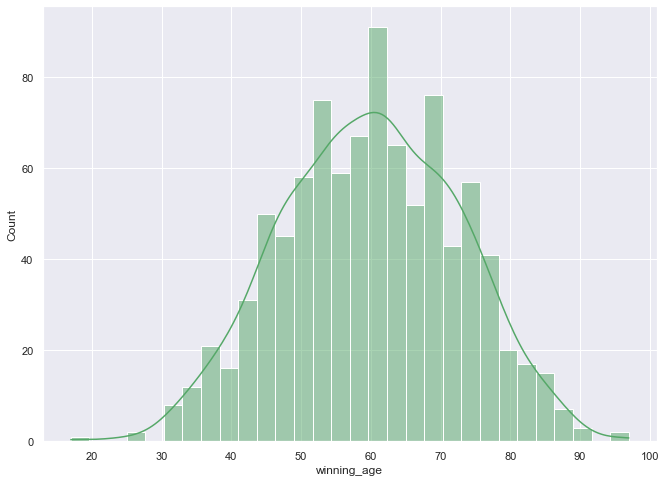

In [38]:
# Распределение возраста лауреатов на момент награждения
sns.set_style('ticks')
sns.set_theme(rc={'figure.figsize':(11,8)})
sns.histplot(df['winning_age'], bins = 30, kde = True, palette='bright', color='g');

In [24]:
df['winning_age'].describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

In [27]:
df[df.winning_age == df.winning_age.min()] # самый младший лауреат

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,17.0


In [45]:
df[df.winning_age == df.winning_age.max()] # самый старший лауреат

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,winning_age
933,2018,Physics,The Nobel Prize in Physics 2018,“for the optical tweezers and their applicatio...,1/2,Individual,Arthur Ashkin,1922-09-02,"New York, NY",United States of America,United States of America,Male,Bell Laboratories,"Holmdel, NJ",United States of America,USA,96.0


## Возраст лауреатов

* Возраст лауреатов Нобелевской премии на момент награждения близок к нормальному распределению, при медианном возрасте **60** лет, средний возраст составляет **59.9** лет

* Самому младшему лауреату премии на момент награждения было **17** лет, это пакистанская правозащитница Malala Yousafzai, получила премию мира в 2014 г. Выступает за доступность образования для женщин.

* Самому старшему лауреату - **97** лет, это химик из США, получил Нобелевскую премию в 2019 г. за разработку литий-ионных батарей

* Большинство лауреатов получают премии в возрасте **60 +/- 13 лет**.


## Задание 2

Как меняется возраст лауреатов в зависимости от категории премии?

Используйте [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot), чтобы показать, как среднее, квартили, максимальное и минимальное значения различаются по категориям. 

У какой категории самые длинные "усы"?

В какой призовой категории средние победители самые старые?

В какой призовой категории средние победители самые молодые?

In [51]:
# Статистика сгруппированная по признаку категории премии
df_by_category = df.groupby(by='category')['winning_age'].agg(['min', 'max', 'median', 'mean', 'std','count'])
df_by_category['max-min']=df_by_category['max']-df_by_category['min']
df_by_category

,min,max,median,mean,std,count,max-min
category,,,,,,,
Chemistry,35.0,97.0,58.0,58.817204,11.859489,186,62.0
Economics,47.0,90.0,67.0,66.965116,8.463691,86,43.0
Literature,42.0,88.0,67.0,64.794872,10.230565,117,46.0
Medicine,32.0,87.0,57.0,58.581081,11.778891,222,55.0
Peace,17.0,87.0,62.0,60.897196,13.387501,107,70.0
Physics,25.0,96.0,55.0,56.439815,14.344794,216,71.0


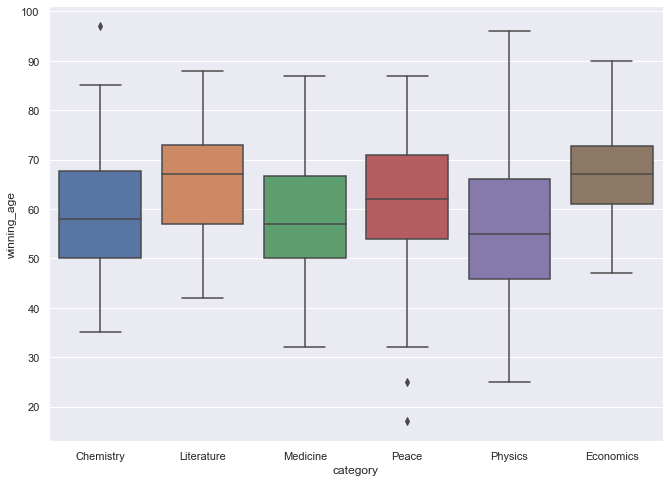

In [40]:
sns.boxplot(x='category', y='winning_age', data=df);

## Анализ возраста лауреатов по категориям

### Как меняется возраст лауреатов в зависимости от категории премии?

* Наименьший размах возрастов в категории "Экономика" (47-90 лет), медиана - 67 лет
* Наибольший размах в категории "Физика" (25-96 лет), медиана - 55 лет
* Наиболее молодые лауреаты встречаются в категориях "Физика" (25 л), "Химия" (35 л), "Медицина" (32 г), "Мир" (32 г)
* Наиболее пожилые лауреаты в категориях "Физика", "Экономика" (>90 лет),
* В категориях "Химия", "Литература", "Медицина", "Мир" - наиболее возрастные лауреаты 85-89 лет


### Как среднее, квартили, максимальное и минимальное значения различаются по категориям.

* Самый низкий медианный возраст - в категории "Физика" (55 лет), к нему близки также категории "Химия" (58) и "Медицина" (57).
* Самый высокий медианный возраст в категории "Литература" и "Экономика" (67 лет)
* Медианный возраст лауреата премии мира - 62 года.

* 25% самых молодых лауреатов (первый квартиль):
    * самый низкий в категории - "Физика" (46 лет)
    * самый высокий - "Экономика" (61 год)
    * в категориях "Химия", "Медицина", "Мир" - в диапозоне 50-58 лет
* 25% самых пожилых лауреатов (третий квартиль)
    * самый низкий в категориии - "Физика" (66 лет), рядом находятся "Химия" и "Медицина" (68-69 лет)
    * самый высокий - "Экономика", "Литература", "Мир" (71-72 года)
* Максимальный возраст лауреатов по всем категориям варьируется от 87 до 97 лет.
    * Максимум зафиксирован в категории "Химия" - 97 лет (смотрели в п.1). Также в категории "Физика" есть лауреат в возрасте 96 лет
* Минимальный возраст лауреатов по всем категориям варьируется от 17 до 47 лет.
    * Минимум зафиксирован в категории "Мир" - 17 лет (смотрели в п.1)
    

### У какой категории самые длинные "усы"?

Самые длинные "усы" в категории "Физика". Размах в этой категории составляет 71 год. 

### В какой призовой категории средние победители самые старые?

Самые старые победители находятся в категории "Литература" и "Экономика" (67 лет)

### В какой призовой категории средние победители самые молодые?

Самые молодые средние победители в категории "Физика" (55 лет)

## Задание 3

Постройте [stacked bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html), который показывает количество мужчин- и женщин-победителей по категориям.

Сколько премий получили женщины в области литературы по сравнению с физикой?

In [59]:
df_by_gender = df.groupby(by=['category', 'sex'])['winning_age'].count()
df_by_gender

category    sex   
Chemistry   Female      7
            Male      179
Economics   Female      2
            Male       84
Literature  Female     16
            Male      101
Medicine    Female     12
            Male      210
Peace       Female     17
            Male       90
Physics     Female      4
            Male      212
Name: winning_age, dtype: int64

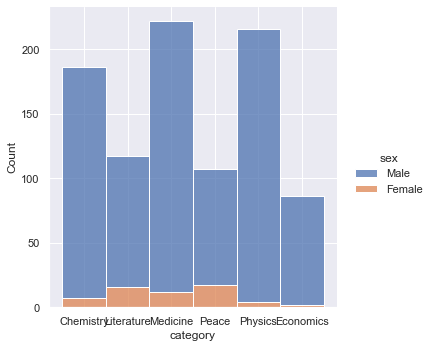

In [47]:
sns.displot(df, x='category', hue='sex', multiple='stack');

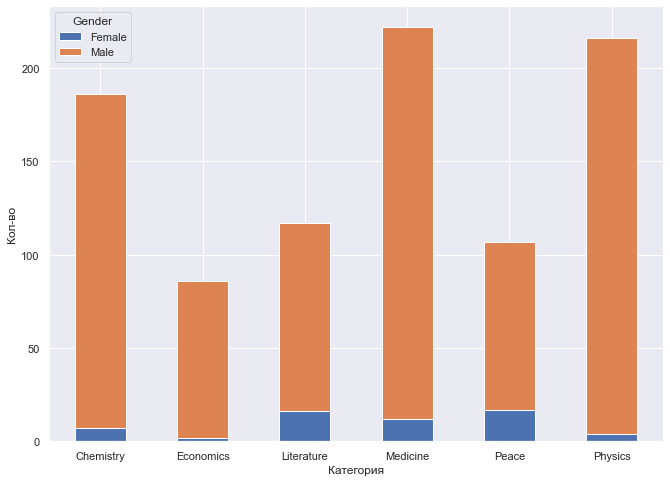

In [69]:
df_by_gender.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Категория')
plt.ylabel('Кол-во')
plt.xticks(rotation=360)
plt.legend(title='Gender')
plt.show()

## Анализ лауреатов по гендерному признаку

* Во всех категориях среди лауреатов значительно преобладают мужчины

* Наиболее заметная доля лауреатов женщин в категориях "Литература", "Медицина", "Мир"

* Наименьшее корличество лауреатов-женщин в категории "Экономика", "Физика", "Химия"

* Лауреатов-женщин в области литературы - 16, в то время как в области физики - 4

* Больше всего женщин-лауреатов в категории "Мир" (17), далее следует "Литература" (16)

* Меньше всего женщин-лауреатов в категории "Экономика" (2), незначительно больше в категории "Физика" (4)